#Phase_1_Project_AR_Air

# Project Overview

    (Hypothetically, let's name the company AR_Air) 

    This project performs an EDA on potential risks AR_Air will likely encounter in its expansion and new business venture.

    The outcomes of the analyses will provide meaningful insights (and further recommend) to AR_Air's management regarding the purchase and operations of selected aircraft(airplanes)

# Business Understanding

## Business Problem

    AR_Air is deliberate on its expansion plans but challenged about the risks involved in executing them. 

    Thus, the need to gain more knowledge for better understanding and development of actionable insights

## Business Aim/Goal

    To diversify the business portfolio by venturing into air transport business

## Business Interest/Purpose

    AR_Air purpose to purchase and operate airplanes for private and commercial enterprises

## Business Objective

    To determine the airplane with the lowest risk for AR_Air to start the new endeavor 

## Business Questions/Metrics

    1. How often do airplane cause accidents-annually? (This informs on frequency and risks-associated with the new venture) 

    2. What type of airplanes are more prone to accidents in private and/or commercial flights? (This informs make/purchase decisions)

    3. What are the major causes of airplane accidents? (This helps in risk mitigation)

## Business Gap

    AR_Air needs to know the potential risks of aircraft, with emphasis on airplanes, to suit their interests, address the objective, and answer their queries

# Data Understanding

#Drop all rows without airplanes;
#Drop non-essential columns;
#Create a new 'Event.Year' column

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics 
import seaborn as snv

In [21]:
data1 = pd.read_csv("AviationData.csv", encoding= 'latin1', low_memory=False)
data1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [22]:
#checking for duplicate data
data1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [23]:
#dropping columns
data1 = data1.drop(['Event.Id', 'Accident.Number', 'Registration.Number', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Location', 'Country', 'Latitude',	'Longitude', 'Airport.Code', 'Airport.Name', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 'Publication.Date'], axis =1)
data1

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,Personal,2.0,0.0,0.0,0.0,Probable Cause
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,Personal,4.0,0.0,0.0,0.0,Probable Cause
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,Personal,3.0,NaN,NaN,NaN,Probable Cause
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,Personal,2.0,0.0,0.0,0.0,Probable Cause
4,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,Personal,1.0,2.0,NaN,0.0,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,Minor,NaN,NaN,PIPER,Personal,0.0,1.0,0.0,0.0,NaN
88885,Accident,2022-12-26,NaN,NaN,NaN,BELLANCA,NaN,0.0,0.0,0.0,0.0,NaN
88886,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,Personal,0.0,0.0,0.0,1.0,NaN
88887,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,Personal,0.0,0.0,0.0,0.0,NaN


In [24]:
#checking for missing values in rows
data1.dropna(inplace = True)
data1

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status
7,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,Personal,0.0,0.0,0.0,2.0,Probable Cause
8,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,Business,0.0,0.0,0.0,2.0,Probable Cause
12,Accident,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,Personal,0.0,0.0,1.0,0.0,Probable Cause
13,Accident,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,Personal,1.0,0.0,0.0,0.0,Probable Cause
14,Accident,1982-01-02,Fatal(1),Destroyed,Airplane,Navion,Personal,1.0,0.0,0.0,0.0,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Accident,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,1.0,The pilots failure to maintain control of the...
88647,Accident,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,2.0,An in-flight collision with a bird while on ap...
88661,Accident,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,Personal,0.0,0.0,0.0,1.0,The pilot did not ensure adequate clearance fr...
88735,Accident,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,ASHO,0.0,1.0,0.0,0.0,The pilots failure to secure the magneto swit...


In [25]:
#split the Event.Date to have a new column for Year
data1['Event.Year'] = pd.to_datetime(data1['Event.Date']).dt.strftime('%Y')
data1

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Event.Year
7,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,Personal,0.0,0.0,0.0,2.0,Probable Cause,1982
8,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,Business,0.0,0.0,0.0,2.0,Probable Cause,1982
12,Accident,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,Personal,0.0,0.0,1.0,0.0,Probable Cause,1982
13,Accident,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,Personal,1.0,0.0,0.0,0.0,Probable Cause,1982
14,Accident,1982-01-02,Fatal(1),Destroyed,Airplane,Navion,Personal,1.0,0.0,0.0,0.0,Probable Cause,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Accident,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,1.0,The pilots failure to maintain control of the...,2022
88647,Accident,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,2.0,An in-flight collision with a bird while on ap...,2022
88661,Accident,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,Personal,0.0,0.0,0.0,1.0,The pilot did not ensure adequate clearance fr...,2022
88735,Accident,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,ASHO,0.0,1.0,0.0,0.0,The pilots failure to secure the magneto swit...,2022


In [26]:
#removing rows for years below 2002
data1 = data1[data1['Event.Year'] >= '2002']
data1

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Event.Year
54904,Accident,2003-06-21,Fatal(1),Destroyed,Airplane,Cessna,Skydiving,1.0,2.0,2.0,1.0,Probable Cause,2003
61280,Accident,2006-08-19,Non-Fatal,Substantial,Helicopter,Mcdonnell Douglas Helicopters,Public Aircraft - Local,0.0,0.0,0.0,2.0,Probable Cause,2006
61649,Accident,2006-11-04,Fatal(2),Destroyed,Airplane,Aircraft Mfg & Dev. Co. (amd),Personal,2.0,0.0,0.0,0.0,Probable Cause,2006
61787,Accident,2006-12-07,Fatal(1),Destroyed,Airplane,Mooney,Personal,1.0,0.0,0.0,0.0,Probable Cause,2006
61947,Accident,2007-01-15,Fatal(2),Substantial,Airplane,Partenavia,Personal,2.0,0.0,0.0,0.0,Probable Cause,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88639,Accident,2022-10-06,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,1.0,The pilots failure to maintain control of the...,2022
88647,Accident,2022-10-08,Non-Fatal,Substantial,Airplane,CESSNA,Personal,0.0,0.0,0.0,2.0,An in-flight collision with a bird while on ap...,2022
88661,Accident,2022-10-13,Non-Fatal,Substantial,Airplane,BEECH,Personal,0.0,0.0,0.0,1.0,The pilot did not ensure adequate clearance fr...,2022
88735,Accident,2022-10-29,Minor,Substantial,Airplane,STEPHEN J HOFFMAN,ASHO,0.0,1.0,0.0,0.0,The pilots failure to secure the magneto swit...,2022


In [27]:
data1.shape

(17183, 13)

In [28]:
#replacing 'Fatal()' with 'Fatal' and incorporating only 2 possible outcomes Fatal or Non-Fatal

data1.loc[~data1['Injury.Severity'].isin(['Non-Fatal']), 'Injury.Severity'] = 'Fatal'

print(data1['Injury.Severity'])

54904        Fatal
61280    Non-Fatal
61649        Fatal
61787        Fatal
61947        Fatal
           ...    
88639    Non-Fatal
88647    Non-Fatal
88661    Non-Fatal
88735        Fatal
88767    Non-Fatal
Name: Injury.Severity, Length: 17183, dtype: object


In [29]:
data1.head()

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Event.Year
54904,Accident,2003-06-21,Fatal,Destroyed,Airplane,Cessna,Skydiving,1.0,2.0,2.0,1.0,Probable Cause,2003
61280,Accident,2006-08-19,Non-Fatal,Substantial,Helicopter,Mcdonnell Douglas Helicopters,Public Aircraft - Local,0.0,0.0,0.0,2.0,Probable Cause,2006
61649,Accident,2006-11-04,Fatal,Destroyed,Airplane,Aircraft Mfg & Dev. Co. (amd),Personal,2.0,0.0,0.0,0.0,Probable Cause,2006
61787,Accident,2006-12-07,Fatal,Destroyed,Airplane,Mooney,Personal,1.0,0.0,0.0,0.0,Probable Cause,2006
61947,Accident,2007-01-15,Fatal,Substantial,Airplane,Partenavia,Personal,2.0,0.0,0.0,0.0,Probable Cause,2007


In [30]:
#removing rows with "Helicopter" in Aircraft.Category
data1 = data1[data1['Aircraft.Category'] != 'Helicopter']
data1.head()

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Event.Year
54904,Accident,2003-06-21,Fatal,Destroyed,Airplane,Cessna,Skydiving,1.0,2.0,2.0,1.0,Probable Cause,2003
61649,Accident,2006-11-04,Fatal,Destroyed,Airplane,Aircraft Mfg & Dev. Co. (amd),Personal,2.0,0.0,0.0,0.0,Probable Cause,2006
61787,Accident,2006-12-07,Fatal,Destroyed,Airplane,Mooney,Personal,1.0,0.0,0.0,0.0,Probable Cause,2006
61947,Accident,2007-01-15,Fatal,Substantial,Airplane,Partenavia,Personal,2.0,0.0,0.0,0.0,Probable Cause,2007
62114,Accident,2007-02-28,Fatal,Destroyed,Airplane,Ingraham,Ferry,1.0,0.0,0.0,0.0,Probable Cause,2007


In [31]:
#removing rows with 'incident' under Investigation.Type
data1 = data1[data1['Investigation.Type'] != 'Incident']
data1.head()

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Report.Status,Event.Year
54904,Accident,2003-06-21,Fatal,Destroyed,Airplane,Cessna,Skydiving,1.0,2.0,2.0,1.0,Probable Cause,2003
61649,Accident,2006-11-04,Fatal,Destroyed,Airplane,Aircraft Mfg & Dev. Co. (amd),Personal,2.0,0.0,0.0,0.0,Probable Cause,2006
61787,Accident,2006-12-07,Fatal,Destroyed,Airplane,Mooney,Personal,1.0,0.0,0.0,0.0,Probable Cause,2006
61947,Accident,2007-01-15,Fatal,Substantial,Airplane,Partenavia,Personal,2.0,0.0,0.0,0.0,Probable Cause,2007
62114,Accident,2007-02-28,Fatal,Destroyed,Airplane,Ingraham,Ferry,1.0,0.0,0.0,0.0,Probable Cause,2007


In [42]:
#checking for any  missing values in the cleaned dataframe
data1.isna().sum()

Investigation.Type        0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Report.Status             0
Event.Year                0
dtype: int64

In [32]:
#creating a file from the cleaned_data
data1.to_csv("Clean_data.csv")

# Data Analysis

In [33]:
#plot for accidents vs year
#creating a numerical data list for accidents by year (between 2002 and 2022)
event_year = list(data1["Event.Year"].value_counts().index)
event_year

['2008',
 '2009',
 '2011',
 '2012',
 '2010',
 '2016',
 '2014',
 '2018',
 '2017',
 '2015',
 '2013',
 '2019',
 '2020',
 '2022',
 '2021',
 '2007',
 '2006',
 '2003']

    2008 and 2003 had the highest and lowest number of airplane accidents, respectively 

In [34]:
#code with event_year counts
event_year_counts = list(data1['Event.Year'].value_counts())
event_year_counts

[1419,
 1337,
 1334,
 1309,
 1297,
 1144,
 1103,
 1103,
 1100,
 1091,
 1072,
 817,
 564,
 379,
 298,
 77,
 2,
 1]

    For the selected period, 1419 and 1, were the highest and lowest counts of airplane accidents in a given year

In [35]:
#creating numerical for total accidents by Investigation.Type
number_of_accidents = data1['Investigation.Type'].value_counts()
number_of_accidents

Investigation.Type
Accident    15447
Name: count, dtype: int64

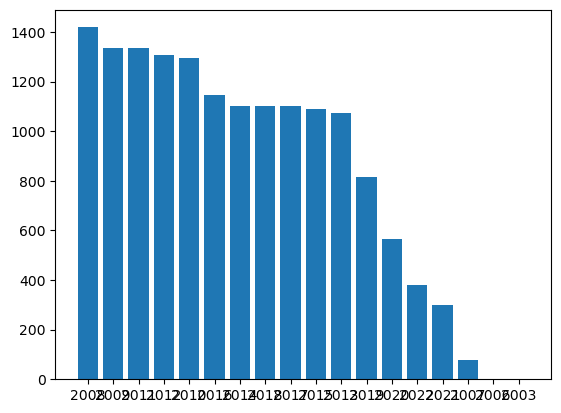

In [36]:
#Bar plot showing the number of accidents btw 2002 and 2022

bar_chart_title= "Number of Accidents between 2002 and 2022"
fig, ax= plt.subplots()

plt.bar(event_year, event_year_counts)
plt.show()

In [37]:
low_risk_plane = data1['Make'].value_counts()
low_risk_plane.tail(10)

Make
LEINEKE WALTER L          1
DOVA AIRCRAFT SRO         1
DARROW STEPHEN            1
TAYLORCRAFT CORP          1
Degraw                    1
ROLLADEN SCHNEIDER OHG    1
HAMLIN JOHN D             1
DIXON                     1
DAVIDSON                  1
STEPHEN J HOFFMAN         1
Name: count, dtype: int64

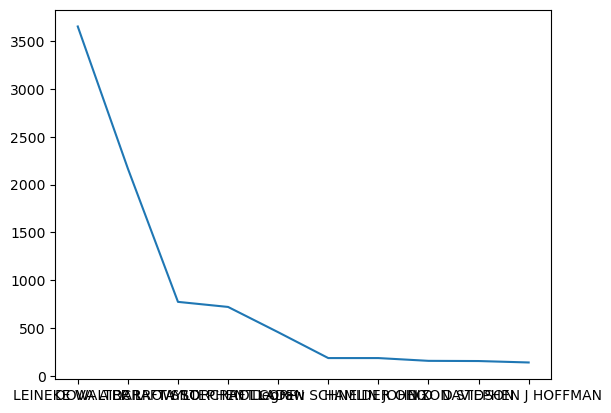

In [38]:
#determining make with high-low risk
#plot injury.severity vs. make
#plot aircraft.damage vs make

low_risk_airplane = data1['Make'].value_counts().tail(10).index
low_risk_airplane
high_risk_airplane = data1['Make'].value_counts().head(10).index
high_risk_airplane
make_accident_counts = list(data1['Make'].value_counts().head(10))
make_accident_counts

fig, ax = plt.subplots()
plt.plot(low_risk_airplane, make_accident_counts)
plt.show()


In [39]:
#major reasons for accidents
#determine counts in Report.Status (if_any)
reasons_for_accidents = data1['Report.Status'].value_counts()
reasons_for_accidents

Report.Status
Probable Cause                                                                                                                                                                                       80
The pilot's failure to maintain directional control during the landing roll.                                                                                                                         56
A loss of engine power for undetermined reasons.                                                                                                                                                     49
The pilot's failure to maintain directional control during landing.                                                                                                                                  43
A total loss of engine power for undetermined reasons.                                                                                                                                    

#Major accident causes were identified as: 
'Probable Cause''
The pilot's failure to maintain directional control during the landing rol'6'
A loss of engine power for undetermined reons'4'9
The pilot's failure to maintain directional control during land'  '43
A total loss of engine power for undetermined rea'ns. 

    All airplanes that had at least one (1) count of accident were considered 'low-risk'

In [40]:
#plot the top_10_reasons for accidents
top_10_reasons = data1['Report.Status'].value_counts().head(10).index
top_10_reasons


Index(['Probable Cause',
       'The pilot's failure to maintain directional control during the landing roll.',
       'A loss of engine power for undetermined reasons.',
       'The pilot's failure to maintain directional control during landing.',
       'A total loss of engine power for undetermined reasons.',
       'The loss of engine power for undetermined reasons.', '<br /><br />',
       'The pilots failure to maintain directional control during the landing roll.\r\n\r',
       'The pilot's improper recovery from a bounced landing.',
       'The pilots failure to maintain directional control during the landing roll.'],
      dtype='object', name='Report.Status')

C:\Users\Administrator\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.nda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


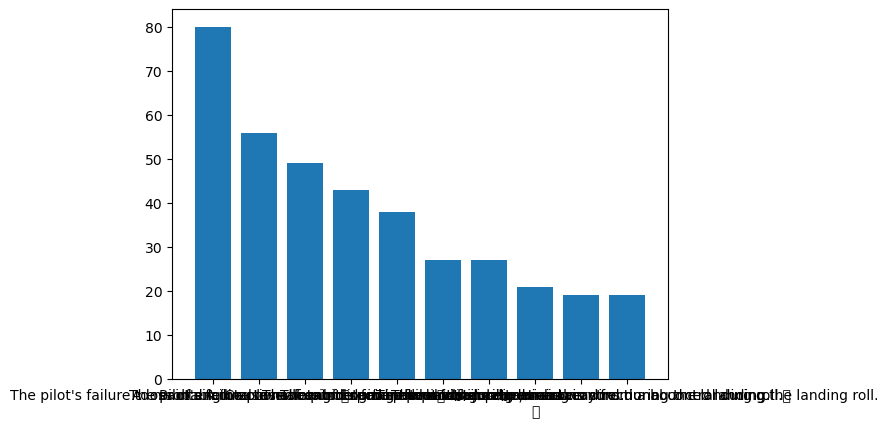

In [45]:
top_10_reasons_counts = list(data1['Report.Status'].value_counts().head(10))
fig, ax = plt.subplots()
plt.bar(top_10_reasons, top_10_reasons_counts)
plt.show()

# Recommendations

Future airplane accidents should not be predicted since no correlation exists from the previous years. 
A wide range of airplanes of different makes with the lowest risk of accidents exist that AR_Air should consider for their private and commercial operations, such as Degraw, LEINEKE WALTER L, DOVA AIRCRAFT SRO, DARROW STEPHEN TAYLORCRAFT CORP, ROLLADEN SCHNEIDER OHG, HAMLIN JOHN D, DIXON, DAVIDSON
AR_Air should invest in continuous professional development among pilots to reduce aviation accidents.
Decisions for air transport business ventures should not be made solely on accidents, more research is required for better decision-making 